In [1]:
'''
Имеются данные за два года по аренде велосипедов: с 4 января 2015 по 3 января 2017. (london.csv)
Изучим динамику числа аренд, наличие связи с погодными условиями и выходными, 
а также объясним несколько аномалий.

Описание данных:
timestamp – дата и время (точность до часа)
cnt – количество аренд велосипедов за этот час
t1 – температура, в С
t2 – температура "ощущается как", в С 
hum – влажность (%)
wind_speed – скорость ветра, км/ч
weather_code – погодные условия:
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
isholiday – является ли день праздником (1 – праздник, 0 – нет)
isweekend –  является ли день выходным (1 – выходной, 0 – нет)
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)
'''

'\nИмеются данные за два года по аренде велосипедов: с 4 января 2015 по 3 января 2017. (london.csv)\nИзучим динамику числа аренд, наличие связи с погодными условиями и выходными, \nа также объясним несколько аномалий.\n\nОписание данных:\ntimestamp – дата и время (точность до часа)\ncnt – количество аренд велосипедов за этот час\nt1 – температура, в С\nt2 – температура "ощущается как", в С \nhum – влажность (%)\nwind_speed – скорость ветра, км/ч\nweather_code – погодные условия:\n1 – ясно (SKC)\n2 – преимущественно ясно / встречаются отдельные облака (SCT)\n3 – облачно / значительные облака (BKN)\n4 – пасмурно (OVC)\n7 – небольшой дождь Rain/ light Rain shower/ Light rain \n10 – дождь с грозой\n26 – снегопад \n94 – ледяной туман (да, такое бывает!)\nisholiday – является ли день праздником (1 – праздник, 0 – нет)\nisweekend –  является ли день выходным (1 – выходной, 0 – нет)\nseason – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-tverskoj/github/training/london.csv', parse_dates=[0])

print(df.dtypes, df.isna().sum()) # убедился, что даты распарсились, проверил, есть ли пустые значения
df

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


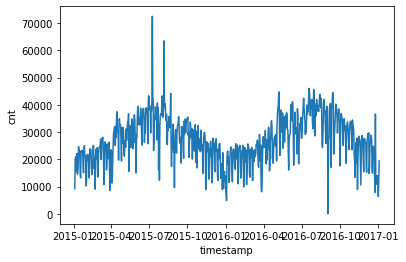

In [4]:
# Построим линейный график количества аренд в разбивке по дням. Почасовые значения аггрегируем в рамках каждого дня:
cnt_daily = df.set_index('timestamp').resample(rule='D').cnt.sum()


cnt_daily=cnt_daily.reset_index()
sns.lineplot(x=cnt_daily.timestamp, y=cnt_daily.cnt)


# Максимальное число аренд в день превысило 70000.
# Есть резкие скачки как вверх, так и вниз. 
# Зимой аренд меньше, чем летом.

In [13]:
# применим скользящее среднее, чтобы сгладить все крупные суточные скачки, усреднив их с днем до и после:
cnt_daily_avg = cnt_daily.rolling(window=3).mean()

In [6]:
# возьмём совокупность разностей полученных значений с реальными наблюдениями 
# посчитаем стандартное отклонение для такой разности.
diff = cnt_daily.reset_index().cnt - cnt_daily_avg.reset_index().cnt
sd = np.std(diff)
sd

4558.58664111794

In [11]:
# Добавим колонки нижнего и верхнего 99% - доверительного интервала для каждого усредненного наблюдения:

cnt_daily_avg['lower_bound'] = cnt_daily_avg.cnt - 2.576 * sd
cnt_daily_avg['upper_bound'] = cnt_daily_avg.cnt + 2.576 * sd

In [12]:
# Присоединим к полученной таблице исходные неусредненные значения 
# и найдём те из них, которые вышли за границы доверительных интервалов:

cnt_daily_avg.dropna().merge(cnt_daily, how='inner', on='timestamp') \
                      .query('cnt_y > upper_bound | cnt_y < lower_bound')

# Наиболее существенные аномальные значения наблюдаются 
# 2015-07-09 - был резкий скачок, причиной которого судя по новостям является забастовка сотрудников метро
# 2016-09-02 - либо ошибка в сборе данных, либо сервис в этот день не работал вовсе

# Итого - скользящее среднее было применено для того, чтобы сгладить скачки показателя,
# после чего все скачки по сравнению с усредненными значениями были собраны в выборку, 
# у которой было вычислено стандартное отклонение
# исходя из этого, были построены доверительные интервалы 99 % для каждрого усредненного значения,
# после чего предполагалось, что в 99% случаев истинное значение не будет отличаться от усредненного более, чем
# в пределах доверительного интервала.
# удалось найти 13 значений, не вошедших в доверительный интервал, что менее процента от общего обьёма наблюдений

KeyError: 'timestamp'

In [17]:
cnt_daily_avg = cnt_daily.rolling(window=3).mean()
cnt_daily_avg

,cnt
0,NaN
1,NaN
2,16739.666667
3,20683.000000
4,19092.666667
...,...
726,12682.000000
727,12347.333333
728,9803.666667
729,9889.333333
